### Homework assignment for clinical NLP

(1) Regular Expressions. Complete first 8 “lessons” at https://regexone.com/

In [22]:
print "Done"

Done


(2) Propose a simple way of finding negations in a sentence using regular expressions.  
Your regular expression should make use of the | and * symbols.

In [23]:
import re

s = "nor not no northern"
match = re.findall(r'no[r|t]*\s+',s)

for word in match:
    print word
    

nor 
not 
no 


(3) Use NLTK to tokenize, stem, POS tag, and find named entities in 
“Fx of obesity but no fx of coronary artery diseases.”  
What named entities are in this sentence? What named entities does NLTK recognize? 
Use NLTK to plot the parse tree returned by 

[u'Which', u'Fx', u'of', u'obes', u'but', u'no', u'fx', u'of', u'coronari', u'arteri', u'diseas']
[('Which', 'JJ'), ('Fx', 'NNP'), ('of', 'IN'), ('obesity', 'NN'), ('but', 'CC'), ('no', 'DT'), ('fx', 'NN'), ('of', 'IN'), ('coronary', 'JJ'), ('artery', 'NN'), ('disease', 'NN')]
(S
  (PERSON Which/JJ Fx/NNP)
  of/IN
  obesity/NN
  but/CC
  no/DT
  fx/NN
  of/IN
  coronary/JJ
  artery/NN
  disease/NN)


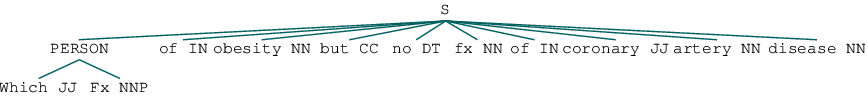

In [24]:
import nltk
import os
s = "Which Fx of obesity but no fx of coronary artery disease"
tokens = nltk.word_tokenize(s)

print [nltk.PorterStemmer().stem(t) for t in tokens] 

print nltk.pos_tag(tokens)

print(nltk.ne_chunk(nltk.pos_tag(tokens), binary=False))

sentence = nltk.ne_chunk(nltk.pos_tag(tokens))

import os
from IPython.core.display import display
os.environ['PATH'] += os.pathsep + '/usr/local/Cellar/ghostscript/9.20/bin'
sentence

 







 



(4) Give several tokens with the “WDT” POS tag

In [25]:
print nltk.help.upenn_tagset('WDT')

s = "which Fx of obesity but no fx of coronary artery disease"
tokens = nltk.word_tokenize(s)

print [nltk.PorterStemmer().stem(t) for t in tokens] 

print nltk.pos_tag(tokens)

print(nltk.ne_chunk(nltk.pos_tag(tokens), binary=False))

WDT: WH-determiner
    that what whatever which whichever
None
[u'which', u'Fx', u'of', u'obes', u'but', u'no', u'fx', u'of', u'coronari', u'arteri', u'diseas']
[('which', 'WDT'), ('Fx', 'NNP'), ('of', 'IN'), ('obesity', 'NN'), ('but', 'CC'), ('no', 'DT'), ('fx', 'NN'), ('of', 'IN'), ('coronary', 'JJ'), ('artery', 'NN'), ('disease', 'NN')]
(S
  which/WDT
  Fx/NNP
  of/IN
  obesity/NN
  but/CC
  no/DT
  fx/NN
  of/IN
  coronary/JJ
  artery/NN
  disease/NN)


(5) Create a dispersion plot of "moon, earth, sun, mars" in the 'sci.space' category of 20 newsgroups.

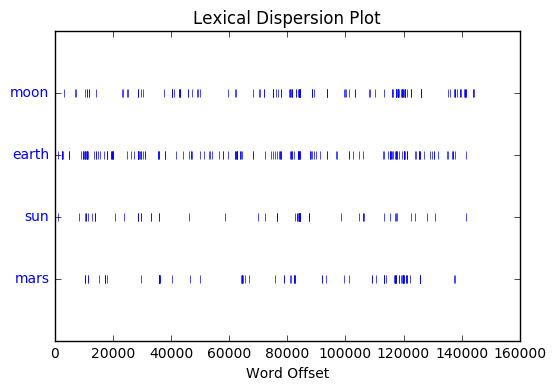

In [26]:
import nltk
import itertools

from nltk.tokenize import sent_tokenize, word_tokenize

from sklearn.datasets import fetch_20newsgroups
sci = ['sci.space']
science_news = fetch_20newsgroups(subset='train', categories=sci, 
                                  remove=('headers', 'footers', 'quotes'))

tokens = list()
for doc in science_news.data:
 sents = nltk.sent_tokenize(doc)
 for i, s in enumerate(sents):
    tokens.append(nltk.word_tokenize(s))

all_tokens = list(itertools.chain.from_iterable(tokens))

normalized_tokens = [t.lower() for t in all_tokens]

text_tokens = nltk.Text(normalized_tokens)
text_tokens.dispersion_plot(['moon','earth','sun','mars'])   
  


   
 
    
 


 


 

  






 


(6) Write a tag pattern to cover noun phrases that contain gerunds, 
e.g. "the/DT receiving/VBG end/NN", "assistant/NN managing/VBG editor/NN". 
Add these patterns to the grammar, one per line. 
Test your work using some tagged sentences of your own devising.

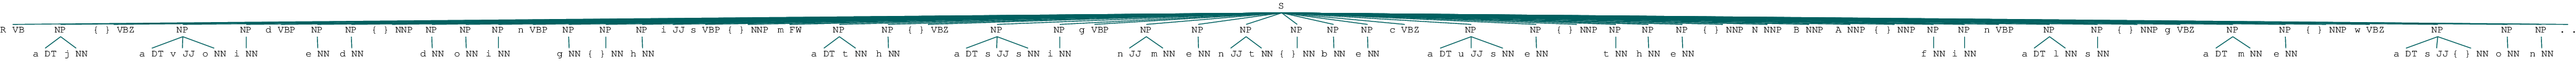

In [27]:
import nltk

import os
from IPython.core.display import display
os.environ['PATH'] += os.pathsep + '/usr/local/Cellar/ghostscript/9.20/bin'

grammar= r"""
Gerunds: {<DT>?<NN>?<VBG><NN>}
NP: {<DT|PP\$>?<JJ>*<NN>} """

cp = nltk.RegexpParser(grammar)

sent_chunked = nltk.ne_chunk(nltk.pos_tag("Raj avoided doing his math assignment because the NBA finals game was on."))

display(cp.parse(sent_chunked))

 

(7) Use the function nltk.ne_chunk_sents to find top 10 most common named entities in the 'sci.med' category of 20 newsgroups.

In [28]:
from nltk import FreqDist
fdist = FreqDist(text_tokens)
fdist.most_common(10)

[(u'the', 6298),
 (u',', 6115),
 (u'.', 5567),
 (u'of', 2964),
 (u'to', 2836),
 (u'and', 2594),
 (u'a', 2535),
 (u')', 2037),
 (u'(', 1933),
 (u'in', 1811)]

(8) Look at http://scikit-learn.org/stable/modules/feature_extraction.html

Start by initializing ngram_vectorizer = CountVectorizer(analyzer='char_wb', ngram_range=(2, 2), min_df=1)

- Apply this to “Fx of obesity but no fx of coronary artery diseases.” 
- How many features are there?
- How many features do you get with setting ngram_range=(2, 5)?

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
s = "Fx of obesity but no fx of coronary artery diseases."
ngram_vectorizer = CountVectorizer(analyzer='char_wb', ngram_range=(2, 2), min_df=1)
x = ngram_vectorizer.fit_transform(s)
print len(ngram_vectorizer.get_feature_names())

ngram_vectorizer = CountVectorizer(analyzer='char_wb', ngram_range=(2, 5), min_df=1)
x = ngram_vectorizer.fit_transform(s)
print len(ngram_vectorizer.get_feature_names())
 

32
48


(9) Read article on Parsey McParseface:

https://www.washingtonpost.com/news/wonk/wp/2016/05/18/googles-new-artificial-intelligence-cant-understand-these-sentences-can-you/?utm_term=.cf835cf7e5fd

What is a garden-path sentence?  
Can Parsey McParseface help with pronoun resolution across sentences?

A garden-path sentence is a sentence that is grammatically correct, but where the words are arranged in a way that confuses the reader.  If Parsey McParseface can accurately identify and link the subject and action in a garden-path sentence, it can likely help with pronoun resolution across sentences.